In [5]:
import pickle
import sqlite3
import numpy as np
import pandas as pd
execfile('Imports.py')
import Modules.Funcs as funcs
from Modules.Classes import Simulation
from Modules.Classes import CopyTweak
from Modules.Classes import Packer
from Modules.Classes import ConjugateJK13
from Modules.Classes import RepresentJK13
from Modules.Classes import CopyTweakRep
from Modules.Classes import PackerRep
from Modules.Classes import NegatedSpace
from Modules.Classes import NConjugateJK13
from Modules.Classes import NRepresentJK13
from Modules.Classes import NPacker
from Modules.Classes import NCopyTweak

dbname = 'experiments-5con.db'#raw data
dataname = 'xcrABC' #for parms
execfile('validate_data.py')

con = sqlite3.connect(dbname)
participants = pd.read_sql_query("SELECT participant, condition from participants", con)
generation = pd.read_sql_query("SELECT * from generation", con)
alphas = pd.read_sql_query("SELECT * from alphas", con)
stimuli = pd.read_sql_query("SELECT * from stimuli", con).values
con.close()

#Get current best parms                                                                                                                    
with open(pickledir+bestparmchtc,'rb') as f:
    best_params_t = pickle.load(f)
best_params = funcs.compress_chtc_parms(best_params_t)




In [6]:
best_params

{'Copy and Tweak': {'determinism': 2.22891029503993,
  'specificity': 3.5396630293336018},
 'Hierarchical Sampling': {'category_mean_bias': 1.0000327265305869e-10,
  'category_variance_bias': 18.92021487458588,
  'determinism': 3.895473857046918,
  'domain_variance_bias': 0.05323223552335394},
 'Hierarchical Sampling With Representativeness': {'category_mean_bias': 11.360054787180163,
  'category_variance_bias': 2.068337521917928,
  'determinism': 4.390279894251988,
  'domain_variance_bias': 1.5158286357698976},
 'Negated Copy and Tweak': {'determinism': 2.21438615607325,
  'negwt': 0.13744893233320324,
  'specificity': 3.6021606272914735},
 'Negated Hierarchical Sampling': {'category_mean_bias': 7.17387850240236,
  'category_variance_bias': 3.365125491745154e+60,
  'determinism': 1.0583221195344928e+16,
  'domain_variance_bias': 29530662.655135598,
  'negwt': 2.002850429625717},
 'Negated Hierarchical Sampling With Representativeness': {'category_mean_bias': 11.821683514178702,
  'cat

{'category_variance_bias': 2.068337521917928, 'determinism': 4.390279894251988, 'category_mean_bias': 11.360054787180163, 'domain_variance_bias': 1.5158286357698976}
[[0.007 0.009 0.012 0.017 0.024 0.034 0.051 0.    0.   ]
 [0.006 0.007 0.01  0.013 0.017 0.024 0.034 0.049 0.072]
 [0.006 0.007 0.008 0.01  0.013 0.017 0.023 0.031 0.044]
 [0.005 0.006 0.007 0.008 0.01  0.013 0.016 0.021 0.028]
 [0.005 0.006 0.006 0.007 0.008 0.01  0.012 0.015 0.019]
 [0.006 0.006 0.006 0.007 0.007 0.008 0.009 0.011 0.013]
 [0.006 0.006 0.006 0.006 0.006 0.007 0.007 0.008 0.009]
 [0.007 0.007 0.006 0.006 0.006 0.006 0.006 0.007 0.007]
 [0.009 0.008 0.007 0.006 0.006 0.006 0.005 0.005 0.006]]
[[0.007 0.008 0.008 0.007 0.006 0.005 0.004 0.003 0.002]
 [0.01  0.011 0.011 0.01  0.009 0.007 0.006 0.004 0.003]
 [0.013 0.014 0.014 0.013 0.012 0.01  0.008 0.006 0.004]
 [0.016 0.017 0.017 0.016 0.015 0.012 0.01  0.008 0.006]
 [0.018 0.019 0.019 0.019 0.017 0.015 0.012 0.009 0.007]
 [0.019 0.02  0.021 0.    0.019 0.0

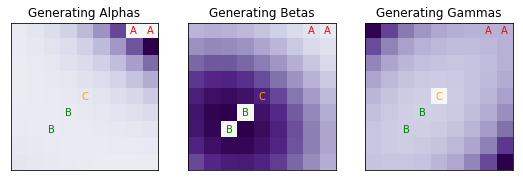

In [8]:
import matplotlib.pyplot as plt
wrap_ax = None
model = RepresentJK13
params = best_params[model.model]
#params = dict({'determinism':1,'unit_var':.1}) #for dumb Negated

# params = best_params[CopyTweak.model]
# params['negwt'] = 2
print(params)
c1 = np.array([[-1.,-1.],[1.,-1.],[-1.,1.],[1.,1.]])
c1 = np.array([[1.,1],[.75,1]])


c2 = np.array([[-.25,-.25],[-.5,-.5]])#,[-.25,-.5],[1,-1]])
c3 = np.array([[0,0]])
categories = [c1,c2,c3]
catstr = ['Generating Alphas','Generating Betas','Generating Gammas']

STAT_LIMS = (-1.0, 1.0)
betacol = ['green' for bi in range(len(c2))]
f,ax = plt.subplots(1,len(categories),figsize=(3*len(categories),3))
# params['category_mean_bias'] = .1
for ci in range(len(categories)):
    ps = model(categories,params,wrap_ax=wrap_ax).get_generation_ps(stimuli,ci,'generate')
    print(np.flipud(np.round(np.reshape(ps,(9,9)),3)))
    gps = funcs.gradientroll(ps,'roll')[:,:,0]
    ps_ElRange = gps.max()-gps.min();
    plotVals = (gps-gps.min())/ps_ElRange
    if len(categories)>2:
        gammas = categories[2]
    else:
        gammas = []
    funcs.plotgradient(ax[ci], plotVals, categories[0], categories[1], gammas = gammas,clim = STAT_LIMS, cmap = 'PuOr',beta_col=betacol)
    ax[ci].set_title(catstr[ci])
# plt.close()
# categories2 = [np.array([[-1.,-1.],[1.,-1.],[-1.,-.75],[1.,-.75]])]
# temp2 = model(categories2,params,wrap_ax=wrap_ax).get_generation_ps(stimuli,1,'generate',wrap_ax=wrap_ax)
# print(np.round(np.reshape(temp2,(9,9)),3))

{'theta_target': 3.4614664092065315, 'negwt': 0, 'theta_cntrst': 3.0283346951586387, 'specificity': 0.5097943564106868}
[[0.033 0.025 0.019 0.019 0.03  0.066 0.141 0.    0.   ]
 [0.015 0.011 0.008 0.007 0.011 0.025 0.054 0.114 0.157]
 [0.006 0.004 0.003 0.003 0.004 0.009 0.02  0.043 0.06 ]
 [0.003 0.002 0.001 0.001 0.002 0.003 0.007 0.016 0.023]
 [0.001 0.001 0.    0.    0.001 0.001 0.003 0.006 0.008]
 [0.001 0.    0.    0.    0.    0.001 0.001 0.003 0.004]
 [0.    0.    0.    0.    0.    0.    0.001 0.002 0.003]
 [0.001 0.    0.    0.    0.    0.001 0.001 0.002 0.003]
 [0.001 0.    0.    0.    0.    0.001 0.001 0.002 0.003]]
[[0.001 0.001 0.001 0.001 0.    0.    0.    0.    0.   ]
 [0.001 0.001 0.002 0.001 0.001 0.    0.    0.    0.   ]
 [0.002 0.003 0.003 0.003 0.001 0.001 0.001 0.    0.   ]
 [0.004 0.005 0.007 0.006 0.003 0.002 0.001 0.001 0.001]
 [0.008 0.01  0.014 0.013 0.005 0.003 0.002 0.001 0.001]
 [0.02  0.028 0.04  0.    0.017 0.01  0.007 0.004 0.004]
 [0.037 0.053 0.    0.  

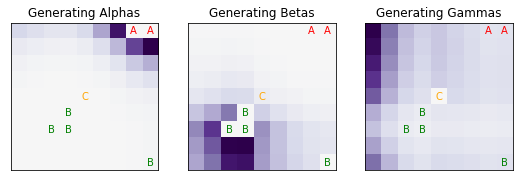

In [8]:
import matplotlib.pyplot as plt
wrap_ax = None
model = Packer
# params = best_params[model.model]
#params = dict({'determinism':1,'unit_var':.1}) #for dumb Negated
params = best_params[Packer.model]
# params['negwt'] = 0
print(params)
c1 = np.array([[-1.,-1.],[1.,-1.],[-1.,1.],[1.,1.]])
c1 = np.array([[1.,1],[.75,1]])


c2 = np.array([[-.25,-.25],[-.5,-.5],[-.25,-.5],[1,-1]])
c3 = np.array([[0,0]])
categories = [c1,c2,c3]
catstr = ['Generating Alphas','Generating Betas','Generating Gammas']

STAT_LIMS = (-1.0, 1.0)
betacol = ['green' for bi in range(len(c2))]
f,ax = plt.subplots(1,len(categories),figsize=(3*len(categories),3))
# params['category_mean_bias'] = .1
for ci in range(len(categories)):
    ps = model(categories,params,wrap_ax=wrap_ax).get_generation_ps(stimuli,ci,'generate')
    print(np.flipud(np.round(np.reshape(ps,(9,9)),3)))
    gps = funcs.gradientroll(ps,'roll')[:,:,0]
    ps_ElRange = gps.max()-gps.min();
    plotVals = (gps-gps.min())/ps_ElRange
    if len(categories)>2:
        gammas = categories[2]
    else:
        gammas = []
    funcs.plotgradient(ax[ci], plotVals, categories[0], categories[1], gammas = gammas,clim = STAT_LIMS, cmap = 'PuOr',beta_col=betacol)
    ax[ci].set_title(catstr[ci])
# plt.close()
# categories2 = [np.array([[-1.,-1.],[1.,-1.],[-1.,-.75],[1.,-.75]])]
# temp2 = model(categories2,params,wrap_ax=wrap_ax).get_generation_ps(stimuli,1,'generate',wrap_ax=wrap_ax)
# print(np.round(np.reshape(temp2,(9,9)),3))

In [1]:
1.0==1
type(1) == int
a = None
not type(1.0) is int or not a == None

True

In [2]:
import pickle
with open('pickles/corner.p','rb') as f:
    trials2 = pickle.load(f)
trials2.task='generate'
trials2.Set[2]

ImportError: No module named Modules.Classes.Simulation

In [3]:
temp = Simulation.extractPptData(trials2,'all',[0,2])
temp.Set

NameError: name 'Simulation' is not defined

In [119]:
import pickle
with open('pickles/corner_c.p','rb') as f:
    trials = pickle.load(f)

In [120]:
trials.Set

[{'categories': [array([ 0,  8, 72, 80]), array([], dtype=float64)],
  'participant': [array([], dtype=int64),
   array([ 10,  17,  20,  21,  22,  26,  27,  32,  33,  44,  45,  58,  59,
           60,  61,  62,  63,  64,  74,  78,  79,  80,  82,  83,  89,  92,
           93,  94,  95, 101, 104, 106, 107, 109, 110, 111, 115, 118, 119,
          120, 123, 128, 130])],
  'response': [array([], dtype=int64),
   array([57, 39, 39, 30, 39, 60, 38, 40, 76, 20, 38, 38, 22, 22, 43,  2, 31,
          45, 67, 39, 24, 66, 40, 37, 70,  6, 40, 40, 56, 69, 60, 60, 58, 39,
          34, 39,  2, 19, 41, 70, 30, 41, 38])],
  'wrap_ax': [array([], dtype=int64),
   array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])]},
 {'categories': [array([ 0,  8, 72, 80]), array([57])],
  'participant': [array([], dtype=int64), array([10])],
  'response': [array([], dtype=int64), array([69])],
  'wrap_ax': [array([], dtype=i

In [61]:
for trial in trials.Set:
    if len(trial['participant'])>3:
        print trial

{'participant': [[], [259], [286, 402], []], 'response': [[], [274], [2489, 1299], []], 'categories': [array([ 403,  818, 1479, 1890]), array([   0,   49, 2450, 2499])], 'wrap_ax': [[], [None], [None, None], []]}


In [113]:
ps_add = np.array([])
ps_add = np.append(ps_add,[34,34,2])
print(ps_add)
np.array(ps_add,dtype=np.int16)

[34. 34.  2.]


array([34, 34,  2], dtype=int16)

In [7]:
di = np.diag_indices(4)
di[0]

array([0, 1, 2, 3])